In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [9]:
print(train.shape) # 1 col extra 'Survival'
print(test.shape)

(891, 12)
(418, 11)


In [10]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [11]:
train.info() //give info if missing val

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
train.drop(columns=['Cabin'],inplace =True)
test.drop(columns=['Cabin'],inplace=True)

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [17]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [18]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
train['Embarked'].fillna('S',inplace=True)

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [22]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [23]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [24]:
(177/891)*100

19.865319865319865

In [28]:
train_age=np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)

In [30]:
test_age=np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)

In [45]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13632\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


ValueError: cannot set using a list-like indexer with a different length than the value

In [46]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13632\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [48]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [49]:
#EDA

In [54]:
train[train['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [62]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [64]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [65]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [67]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13632\2748630497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])#dead blue
D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13632\2748630497.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level

<Axes: xlabel='Age', ylabel='Density'>

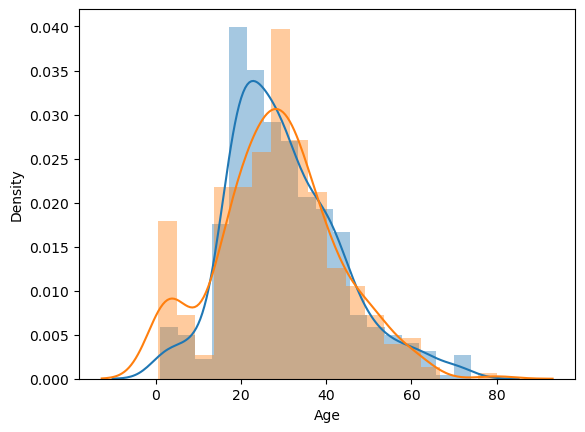

In [72]:
sns.distplot(train['Age'][train['Survived']==0])#dead blue
sns.distplot(train['Age'][train['Survived']==1])#survived orange

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13632\1829424958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])#dead blue
D:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13632\1829424958.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-leve

<Axes: xlabel='Fare', ylabel='Density'>

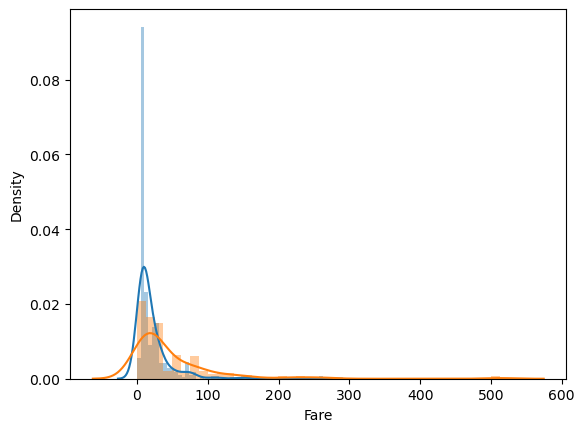

In [73]:
sns.distplot(train['Fare'][train['Survived']==0])#dead blue
sns.distplot(train['Fare'][train['Survived']==1])#survived orange

In [74]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [77]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

In [78]:
train['Family_Size'].value_counts()

Family_Size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [80]:
train.groupby(['Family_Size'],as_index=False)['Survived'].mean()

Family_Size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000

In [81]:
def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Small"
    else:
        return "Large"

In [84]:
train['Family_Size_Grouped']=train['Family_Size'].apply(cal)
test['Family_Size_Grouped']=test['Family_Size'].apply(cal)

In [85]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Fare Embarked  Family_Size Family_Size_Grouped  
0      0   7.2500        S            2               Small  
1      0  71.2833        C            2               Small

In [87]:
train.drop(columns=['SibSp','Parch','Family_Size'],inplace=True)
test.drop(columns=['SibSp','Parch','Family_Size'],inplace=True)

In [88]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [91]:
passengerID=test['PassengerId'].values

In [93]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [94]:
train.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Age                    0
Fare                   0
Embarked               0
Family_Size_Grouped    0
dtype: int64

In [98]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family_Size_Grouped'],drop_first=True)

In [99]:
train.shape

(891, 10)

In [101]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_Size_Grouped'],drop_first=True)

In [103]:
test.shape

(418, 9)

In [112]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [115]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [119]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
y_pred=classifier.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7653631284916201

In [124]:
test

Age      Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  Embarked_S  \
0    34.5    7.8292     False      True      True        True       False   
1    47.0    7.0000     False      True     False       False        True   
2    62.0    9.6875      True     False      True        True       False   
3    27.0    8.6625     False      True      True       False        True   
4    22.0   12.2875     False      True     False       False        True   
..    ...       ...       ...       ...       ...         ...         ...   
413  39.0    8.0500     False      True      True       False        True   
414  39.0  108.9000     False     False     False       False       False   
415  38.5    7.2500     False      True      True       False        True   
416  18.0    8.0500     False      True      True       False        True   
417  39.0   22.3583     False      True      True       False       False   

     Family_Size_Grouped_Large  Family_Size_Grouped_Small  
0                        False                      False  
1                        False                       True  
2                        False                      False  
3                        False                      False  
4                        False                       True  
..                         ...                        ...  
413                      False                      False  
414                      False                      False  
415                      False                      False  
416                      False                      False  
417                      False                       True  

[418 rows x 9 columns]

In [125]:
xf=test.iloc[:,:].values

In [126]:
y_final=classifier.predict(xf)

In [127]:
y_final.shape

(418,)

In [128]:
passengerId.shape

(418,)

In [129]:
final=pd.DataFrame()

In [130]:
final

Empty DataFrame
Columns: []
Index: []

In [131]:
final['passengerId']=passengerId
final['survived']=y_final

In [132]:
final

passengerId  survived
0            892         0
1            893         0
2            894         1
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [134]:
final.to_csv('Submission.csv',index=False)